In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q5.

5.i (Continuous Uniform, Exponential, Bernoulli, Custom Discrete)

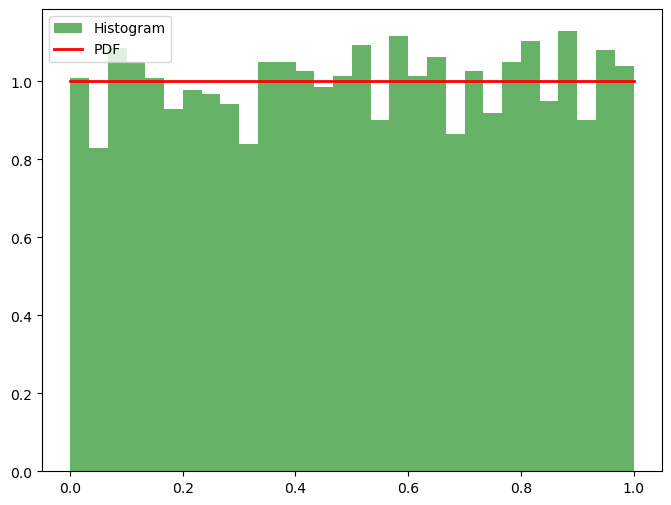

In [36]:
# continuous uniform distribution
def gen_uniform(a, b, num_samples):
    U = np.random.uniform(0, 1, num_samples)
    X = a + (b - a) * U
    return X

a = 0
b = 1
samples = 5000
uniform_samples = gen_uniform(a, b, samples)

plt.figure(figsize=(8, 6))
plt.hist(uniform_samples, bins=30, density=True, alpha=0.6, color='g', label='Histogram')

x = np.linspace(a, b, 1000)
pdf = [1 / (b - a)] * len(x)

plt.plot(x, pdf, 'r-', lw=2, label='PDF')
plt.legend()
plt.show()

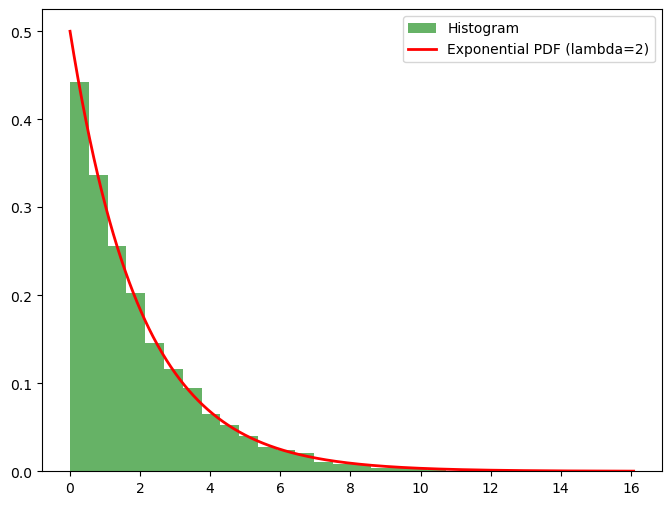

In [37]:
# exponential distribution
def gen_expo(lamb, num_samples):
    U = np.random.uniform(0, 1, num_samples)
    X = -lamb * np.log(U)
    return X

lamb = 2
samples = 5000
exp_samples = gen_expo(lamb, samples)

plt.figure(figsize=(8, 6))
plt.hist(exp_samples, bins=30, density=True, alpha=0.6, color='g', label='Histogram')

x = np.linspace(0, max(exp_samples), 1000)
pdf = (1/lamb) * np.exp(-x/lamb)
plt.plot(x, pdf, 'r-', lw=2, label=f'Exponential PDF (lambda={lamb})')

plt.legend()
plt.show()

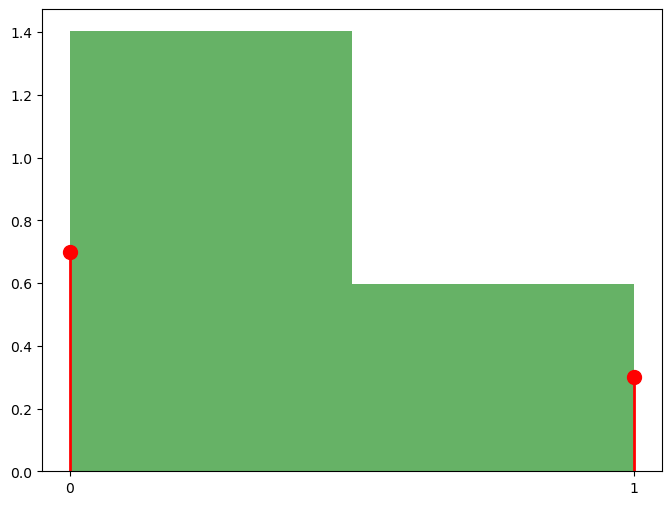

In [44]:
# bernoulli distribution
def gen_bernoulli(p, num_samples):
    U = np.random.uniform(0, 1, num_samples)
    X = np.where(U < (1 - p), 0, 1)
    return X

p = 0.3
samples = 5000
bernoulli_samples = gen_bernoulli(p, samples)

plt.figure(figsize=(8, 6))
plt.hist(bernoulli_samples, bins=2, density=True, alpha=0.6, color='g')

x_values = [0, 1]
pmf_values = [1 - p, p]
plt.plot(x_values, pmf_values, 'ro', ms=10)

plt.vlines(x_values, 0, pmf_values, colors='r', linestyles='-', lw=2)
plt.xticks([0, 1])
plt.show()

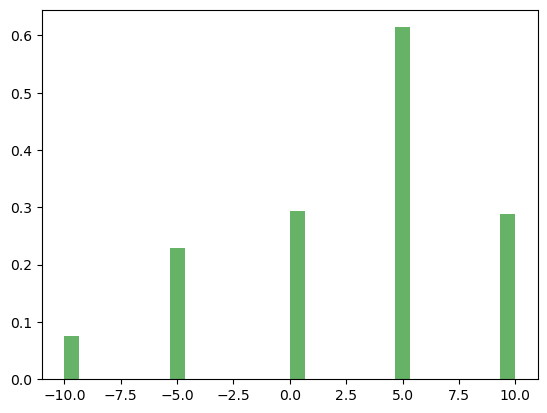

In [47]:
# custom discrete distro
def gen_custom(size, value, prob):
    U = np.random.uniform(0, 1, size)
    cum_prob = np.cumsum(prob)
    X = np.digitize(U, cum_prob)
    return value[X]

ss =  np.array([-10, -5, 0, 5, 10])
p = np.array([0.05, 0.15, 0.2, 0.4])
samples = 5000

custom_samples = gen_custom(samples, ss, p)
plt.hist(custom_samples, bins=30, density=True, alpha=0.6, color='g')
plt.show()

5.ii (Poisson, Binomial, Gamma)

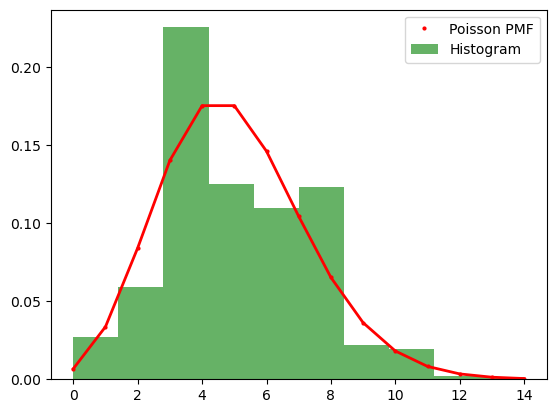

In [70]:
# poisson distribution - composition method
def gen_poisson(lambd):
    T = 0
    n = 0
    while T < 1:
        tau = np.random.exponential(1/lambd)
        T += tau
        n += 1
    return n-1

lambd = 5
samples = 5000
poisson_random_vars = [gen_poisson(lambd) for _ in range(samples)]

x = np.arange(0, max(poisson_random_vars) + 1) 
pmf_values = stats.poisson.pmf(x, lambd) 

plt.plot(x, pmf_values, 'ro', ms=2, label='Poisson PMF')
plt.plot(x, pmf_values, 'r-', lw=2)
plt.hist(poisson_random_vars, bins=10, density=True, alpha=0.6, color='g', label = 'Histogram'); 
plt.legend()
plt.show()

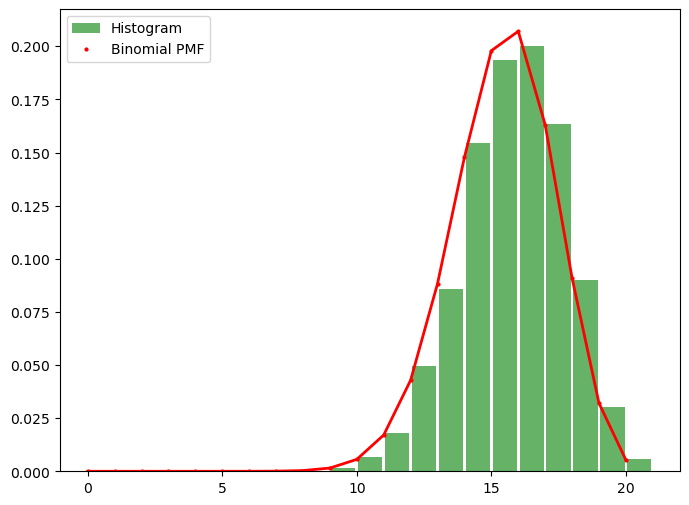

In [71]:
def gen_binomial(n, p, s):
    binomial_samples = []
    for _ in range(s):
        bernoulli_samples = stats.bernoulli.rvs(p, size=n)
        binomial_var = np.sum(bernoulli_samples)
        binomial_samples.append(binomial_var)
    return np.array(binomial_samples)

n = 20
p = 0.77
s = 5000

binomial_samples = gen_binomial(n, p, s)

plt.figure(figsize=(8, 6))
plt.hist(binomial_samples, bins=range(n + 2), density=True, alpha=0.6, color='g', rwidth=0.9, label='Histogram')

x = np.arange(0, n + 1)
pmf_values = stats.binom.pmf(x, n, p)

plt.plot(x, pmf_values, 'ro', ms=2, label='Binomial PMF')
plt.plot(x, pmf_values, 'r-', lw=2)
plt.legend()
plt.show()

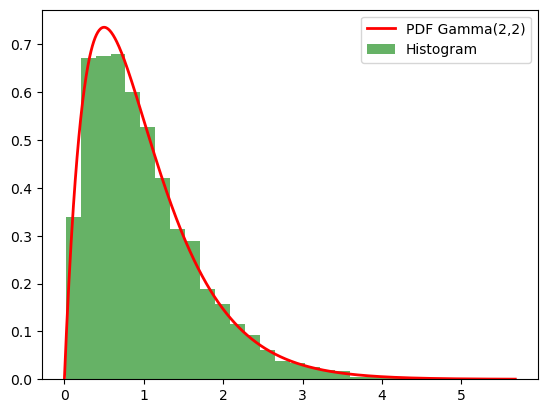

In [83]:
# gamma distribution - composition method
def gen_gamma(a,b):
    X = 0
    for _ in range(a):
        X += np.random.exponential(1/b)
    return X

a = 2
b = 2
samples = 5000
gamma_random_vars = [gen_gamma(a,b) for _ in range(samples)]

x = np.linspace(0, max(gamma_random_vars), 1000)
pdf_values = stats.gamma.pdf(x, a, scale=1/b)

plt.plot(x, pdf_values, 'r-', lw=2, label=f'PDF Gamma({a},{b})')
plt.hist(gamma_random_vars, bins=30, density=True, alpha=0.6, color='g', label='Histogram')
plt.legend()
plt.show()